<a href="https://www.kaggle.com/code/bhanupratapbiswas/shark-tank-india-data-analysis?scriptVersionId=136752710" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

![](https://sm.mashable.com/t/mashable_in/photo/default/shark-tank-india-copy_ck48.1248.jpg)

<center> <h1 style="color:white; background-color:blue; font-size:40px; font-weight:bold; font-family:Times New Roman;" >Shark Tank India</h1> </center>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/shark-tank-indian-companies/ShartankIndiaAllPitches.csv


In [2]:
df = pd.read_csv('/kaggle/input/shark-tank-indian-companies/ShartankIndiaAllPitches.csv')
df.head()

,Episode Number,Brand,Investment Amount (In Lakhs INR),Debt (In lakhs INR),Equity,Anupam,Ashneer,Namita,Aman,Peyush,Vineeta,Ghazal,Season
0,1,BluePine Industries,75,0,18%,N,Y,N,Y,N,Y,N,1
1,1,Booz scooters,40,0,50%,N,Y,N,N,N,Y,N,1
2,1,Heart up my Sleeves,25,0,30%,Y,N,N,N,N,Y,N,1
3,2,Tagz Foods,70,0,3%,N,Y,N,N,N,N,N,1
4,2,Head and Heart,0,0,0%,N,N,N,N,N,N,N,1


# Data Exploration

In [3]:
df_null = df.isna().sum()
print('Number of Null Values:-\n', df_null)

Number of Null Values:-
 Episode Number                      0
Brand                               0
Investment Amount (In Lakhs INR)    0
Debt (In lakhs INR)                 0
Equity                              0
Anupam                              0
Ashneer                             0
Namita                              0
Aman                                0
Peyush                              0
Vineeta                             0
Ghazal                              0
Season                              0
dtype: int64


In [4]:
Df_Unique_values = df['Brand'].unique()
print(' Unique Value:-\n',Df_Unique_values)

 Unique Value:-
 ['BluePine Industries' 'Booz scooters' 'Heart up my Sleeves' 'Tagz Foods'
 'Head and Heart' 'Agro tourism' 'Qzense Labs' 'Peeschute' 'NOCD' 'Cosiq'
 'JhaJi Achaar' 'Bummer' 'Revamp Moto' 'Hungry Heads' 'Shrawani Engineers'
 'Skippi Pops' 'Menstrupedia' 'Hecolll' 'Raising Superstars' 'Torch-it'
 'La Kheer Deli' 'Beyond Snack' 'Vivalyf Innovations- Easy Life'
 'Motion Breeze' 'Altor' 'Ariro' 'Kabira Handmade' 'Nuutjob' 'Meatyour'
 'EventBeep' "Gopal's 56" 'ARRCOAT Surface Textures' 'Farda'
 'Auli Lifestyle' 'SweeDesi' 'LOKA' 'Annie' 'Caragreen' 'The Yarn Bazaar'
 'The Renal Project' 'Morikko Pure Foods' 'Good Good Piggy Bank'
 'Hammer Lifestyle' 'PNT' 'Cocofit' 'Bamboo India' 'Flying Furr'
 'Beyond Water' "Let's Try" 'Find Your Kicks India' 'Aas Vidyalaya'
 'Outbox' 'RoadBounce' "Mommy's Kitchen" 'India Hemp and Co' 'Otua'
 'Anthyesti' 'Ethik' 'WeSTOCK' 'KetoIndia' 'Magic lock' 'The State Plate'
 'Bakarmax' 'IN A CAN' 'Get a Whey' 'Sid07 Designs' 'The Quirky Nari'
 'Hair

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Episode Number,117.0,18.735043,10.070778,1.0,10.0,19.0,27.0,35.0
Investment Amount (In Lakhs INR),117.0,21.683761,26.067766,0.0,0.0,10.0,50.0,80.0
Debt (In lakhs INR),117.0,2.572650,11.544753,0.0,0.0,0.0,0.0,99.0
Season,117.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [6]:
df.corr

<bound method DataFrame.corr of      Episode Number                Brand  Investment Amount (In Lakhs INR)  \
0                 1  BluePine Industries                                75   
1                 1        Booz scooters                                40   
2                 1  Heart up my Sleeves                                25   
3                 2           Tagz Foods                                70   
4                 2       Head and Heart                                 0   
..              ...                  ...                               ...   
112              34        Green Protein                                 0   
113              34              On2Cook                                 0   
114              35        Jain Shikanji                                40   
115              35                Woloo                                 0   
116              35         Elcare India                                 0   

     Debt (In lakhs INR) Equity

In [7]:
df.head(2)

,Episode Number,Brand,Investment Amount (In Lakhs INR),Debt (In lakhs INR),Equity,Anupam,Ashneer,Namita,Aman,Peyush,Vineeta,Ghazal,Season
0,1,BluePine Industries,75,0,18%,N,Y,N,Y,N,Y,N,1
1,1,Booz scooters,40,0,50%,N,Y,N,N,N,Y,N,1


![](https://images.hindustantimes.com/img/2022/01/25/1600x900/anupam_mittal_1643097182557_1643097192769.PNG)

<center> <h1 style="color:white; background-color:blue; font-size:40px; font-weight:bold; font-family:Times New Roman;" >Anupam Mittal</h1></center>  
<p style="font-size:30px; font-weight:bold; font-family:Times New Roman; color:darkred;">Vishwaas apne aap mei paida karo kyuki vishwaas ke bina aadmi 10 kadam bhi nahi chal sakta.</p>

# Anupam Investing Total Companise

In [8]:
df_count_Anupam = df[df['Anupam'] == 'Y']['Anupam'].value_counts()
print('Anupam Investing Total Companise:-', df_count_Anupam)

Anupam Investing Total Companise:- Y    24
Name: Anupam, dtype: int64


In [9]:
df_Investment_Amount_Anupam = df[df['Anupam'] == 'Y']['Investment Amount (In Lakhs INR)'].sum()
print('Anupam Investing Amount:-',df_Investment_Amount_Anupam,'Lakhs')

Anupam Investing Amount:- 816 Lakhs


In [10]:
df_Debt_Amount_Anupam = df[df['Anupam'] == 'Y']['Debt (In lakhs INR)'].sum()
print('Anupam Debt Amount:-',df_Debt_Amount_Anupam,'Lakhs')

Anupam Debt Amount:- 30 Lakhs


![](https://akm-img-a-in.tosshub.com/businesstoday/images/story/202212/2t-97-1659354124-sixteen_nine-sixteen_nine.jpg)

<center> <h1 style="color:white; background-color:blue; font-size:40px; font-weight:bold; font-family:Times New Roman;" >Ashneer Grover</h1></center>  
<p style="font-size:30px; font-weight:bold; font-family:Times New Roman; color:darkred;">Ye Sab Dogalapan Hai… Main Tera Dogalapana Utaarta Hu Abhi…</p> 


# Ashneer Investing Total Companise


In [11]:
df_count_Ashneer = df[df['Ashneer'] == 'Y']['Ashneer'].value_counts()
print('Ashneer Investing Total Companise:-', df_count_Ashneer)

Ashneer Investing Total Companise:- Y    21
Name: Ashneer, dtype: int64


In [12]:
df_Investment_Amount_Ashneer = df[df['Ashneer'] == 'Y']['Investment Amount (In Lakhs INR)'].sum()
print('Ashneer Investing Amount:-',df_Investment_Amount_Ashneer,'Lakhs')

Ashneer Investing Amount:- 731 Lakhs


In [13]:
df_Debt_Amount_Ashneer = df[df['Ashneer'] == 'Y']['Debt (In lakhs INR)'].sum()
print('Ashneer Debt Amount:-',df_Debt_Amount_Ashneer,'Lakhs')

Ashneer Debt Amount:- 129 Lakhs


![](https://resize.indiatvnews.com/en/resize/newbucket/1200_-/2023/01/namita-1672795556.jpg)

<center> <h1 style="color:white; background-color:blue; font-size:40px; font-weight:bold; font-family:Times New Roman;" >Namita Thapar</h1></center> 

# Namita Investing Total Companise

In [14]:
Df_Count_Namita = df[df['Namita'] == 'Y']['Namita'].value_counts()
print('Namita Investing Total Companise:-',Df_Count_Namita)

Namita Investing Total Companise:- Y    22
Name: Namita, dtype: int64


In [15]:
Df_Investment_Amount_Namita = df[df['Namita'] == 'Y']['Investment Amount (In Lakhs INR)'].sum()
print('Namita Investing Amount:-',Df_Investment_Amount_Namita,'Lakhs')

Namita Investing Amount:- 870 Lakhs


In [16]:
df_Debt_Amount_Namita = df[df['Namita'] == 'Y']['Debt (In lakhs INR)'].sum()
print('Namita Debt Amount:-',df_Debt_Amount_Namita,'Lakhs')

Namita Debt Amount:- 0 Lakhs


![](https://images.hindustantimes.com/img/2022/02/01/1600x900/Aman-Gupta_1643727319964_1643727339264.jpg)

<center> <h1 style="color:white; background-color:blue; font-size:40px; font-weight:bold; font-family:Times New Roman;" >Aman Gupta</h1></center> 

# Aman Investing Total Companise

In [17]:
Df_Count_Aman = df[df['Aman'] == 'Y']['Aman'].value_counts()
print('Aman Investing Total Companise:-',Df_Count_Aman)

Aman Investing Total Companise:- Y    28
Name: Aman, dtype: int64


In [18]:
Df_Investment_Amount_Aman = df[df['Aman'] == 'Y']['Investment Amount (In Lakhs INR)'].sum()
print('Aman Investing Amount:-',Df_Investment_Amount_Aman,'Lakhs')

Aman Investing Amount:- 1060 Lakhs


In [19]:
df_Debt_Amount_Aman = df[df['Aman'] == 'Y']['Debt (In lakhs INR)'].sum()
print('Aman Debt Amount:-',df_Debt_Amount_Aman,'Lakhs')

Aman Debt Amount:- 50 Lakhs


![](https://www.koimoi.com/wp-content/new-galleries/2022/02/shark-tank-indias-peyush-bansal-gets-called-out-for-his-cataract-comment-001.jpg)

<center> <h1 style="color:white; background-color:blue; font-size:40px; font-weight:bold; font-family:Times New Roman;" >
Peyush Bansal
</h1></center>

# Peyush Investing Total Companise

In [20]:
Df_Count_Peyush = df[df['Peyush'] == 'Y']['Peyush'].value_counts()
print('Peyush Investing Total Companise:-',Df_Count_Peyush)

Peyush Investing Total Companise:- Y    27
Name: Peyush, dtype: int64


In [21]:
Df_Investment_Amount_Peyush = df[df['Peyush'] == 'Y']['Investment Amount (In Lakhs INR)'].sum()
print('Peyush Investing Amount:-',Df_Investment_Amount_Peyush,'Lakhs')

Peyush Investing Amount:- 886 Lakhs


In [22]:
df_Debt_Amount_Peyush = df[df['Peyush'] == 'Y']['Debt (In lakhs INR)'].sum()
print('Peyush Debt Amount:-',df_Debt_Amount_Peyush,'Lakhs')

Peyush Debt Amount:- 92 Lakhs


![](https://akm-img-a-in.tosshub.com/sites/visualstory/stories/2023_01/story_17201/assets/5.jpeg?time=1672915689)

<center> <h1 style="color:white; background-color:blue; font-size:40px; font-weight:bold; font-family:Times New Roman;" >
Vineeta Singh
</h1></center>

# Vineeta Investing Total Companise

In [23]:
Df_Count_Vineeta = df[df['Vineeta'] == 'Y']['Vineeta'].value_counts()
print('Vineeta Investing Total Companise:-',Df_Count_Vineeta)

Vineeta Investing Total Companise:- Y    15
Name: Vineeta, dtype: int64


In [24]:
Df_Investment_Amount_Vineeta = df[df['Vineeta'] == 'Y']['Investment Amount (In Lakhs INR)'].sum()
print('Vineeta Investing Amount:-',Df_Investment_Amount_Vineeta,'Lakhs')

Vineeta Investing Amount:- 570 Lakhs


In [25]:
df_Debt_Amount_Vineeta = df[df['Vineeta'] == 'Y']['Debt (In lakhs INR)'].sum()
print('Vineeta Debt Amount:-',df_Debt_Amount_Vineeta,'Lakhs')

Vineeta Debt Amount:- 30 Lakhs


![](https://images.indianexpress.com/2022/01/ghazal-shark-tank.jpg)

<center> <h1 style="color:white; background-color:blue; font-size:40px; font-weight:bold; font-family:Times New Roman;" >
Ghazal Alagh
</h1></center>

# Ghazal Investing Total Companise

In [26]:
Df_Count_Ghazal = df[df['Ghazal'] == 'Y']['Ghazal'].value_counts()
print('Ghazal Investing Total Companise:-',Df_Count_Ghazal)

Ghazal Investing Total Companise:- Y    7
Name: Ghazal, dtype: int64


In [27]:
Df_Investment_Amount_Ghazal = df[df['Ghazal'] == 'Y']['Investment Amount (In Lakhs INR)'].sum()
print('Ghazal Investing Amount:-',Df_Investment_Amount_Ghazal,'Lakhs')

Ghazal Investing Amount:- 245 Lakhs


In [28]:
df_Debt_Amount_Ghazal = df[df['Ghazal'] == 'Y']['Debt (In lakhs INR)'].sum()
print('Ghazal Debt Amount:-',df_Debt_Amount_Ghazal,'Lakhs')

Ghazal Debt Amount:- 0 Lakhs


# Data Visualization

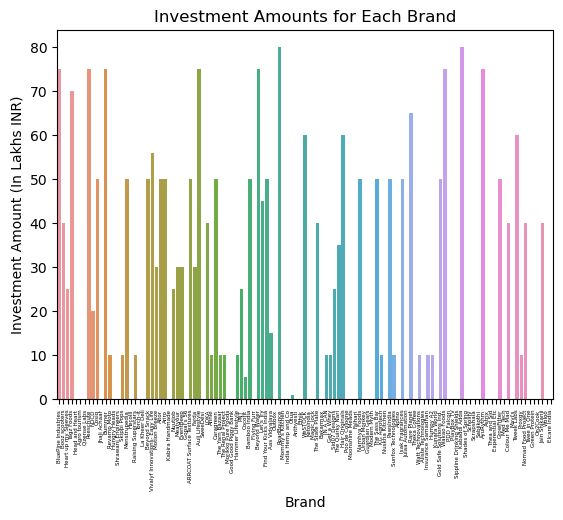

In [29]:
# Create a bar plot of investment amounts for each brand
sns.barplot(x='Brand', y='Investment Amount (In Lakhs INR)', data=df)
plt.xticks(rotation=90, fontsize=4)  # Rotate x-axis labels for better readability
plt.xlabel('Brand')
plt.ylabel('Investment Amount (In Lakhs INR)')
plt.title('Investment Amounts for Each Brand')
plt.show()

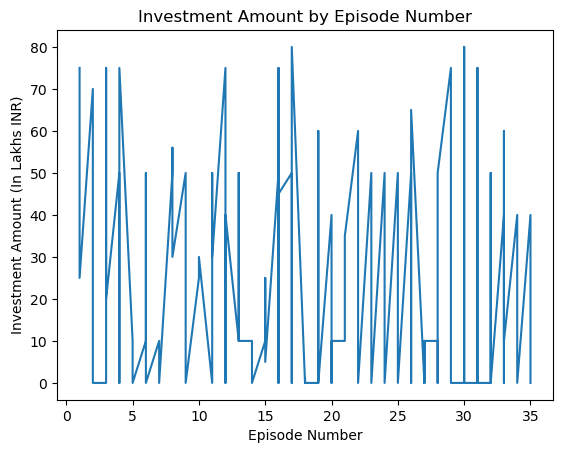

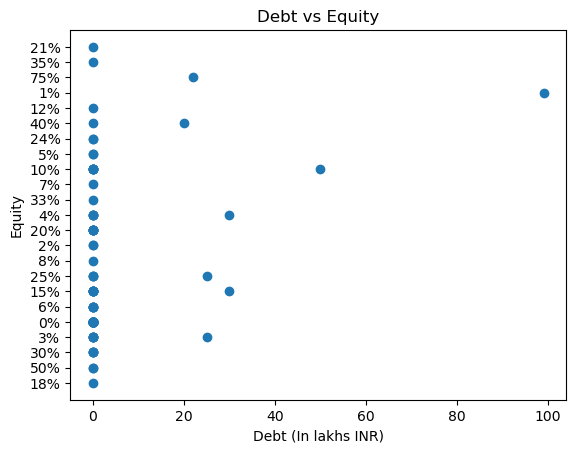

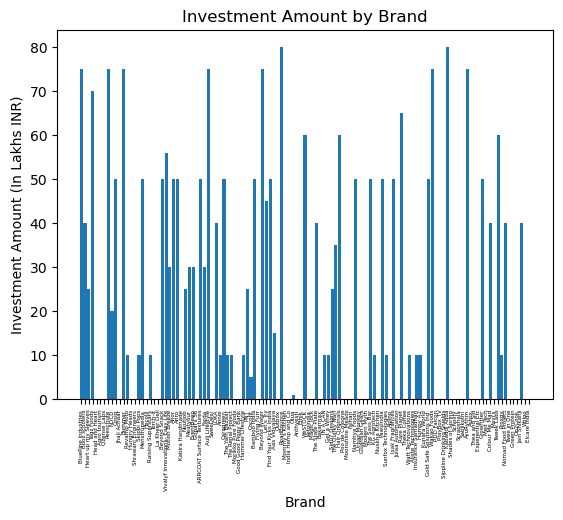

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
df = pd.read_csv('/kaggle/input/shark-tank-indian-companies/ShartankIndiaAllPitches.csv')

# Line Plot
plt.plot(df['Episode Number'], df['Investment Amount (In Lakhs INR)'])
plt.xlabel('Episode Number')
plt.ylabel('Investment Amount (In Lakhs INR)')
plt.title('Investment Amount by Episode Number')
plt.show()

# Scatter Plot
plt.scatter(df['Debt (In lakhs INR)'], df['Equity'])
plt.xlabel('Debt (In lakhs INR)')
plt.ylabel('Equity')
plt.title('Debt vs Equity')
plt.show()

# Bar Plot
plt.bar(df['Brand'], df['Investment Amount (In Lakhs INR)'])
plt.xlabel('Brand')
plt.ylabel('Investment Amount (In Lakhs INR)')
plt.title('Investment Amount by Brand')
plt.xticks(rotation=90, fontsize=4)
plt.show()




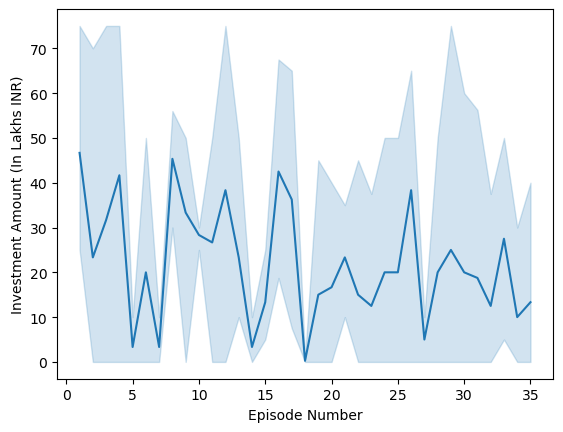

In [31]:
sns.lineplot(x='Episode Number', y='Investment Amount (In Lakhs INR)', data=df)
plt.show()

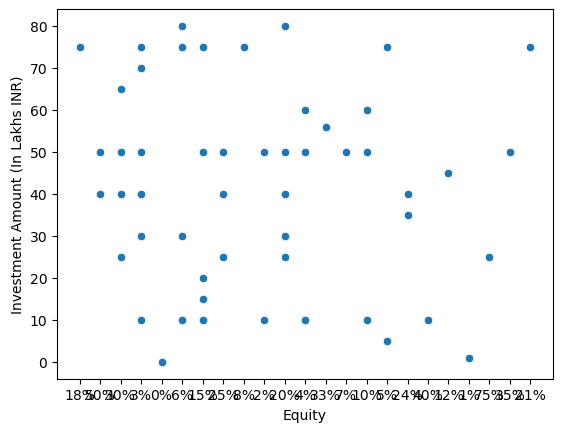

In [32]:
sns.scatterplot(x='Equity', y='Investment Amount (In Lakhs INR)', data=df)
plt.show()

/tmp/ipykernel_20/3843070239.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


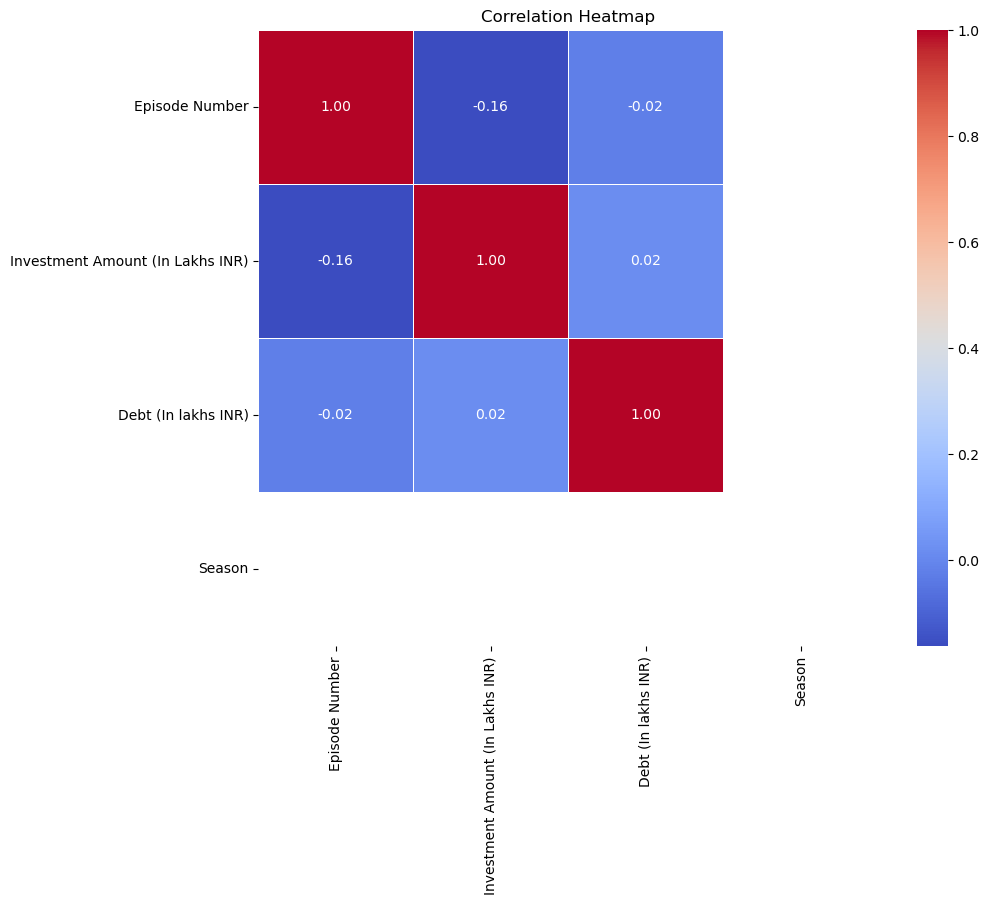

In [33]:
columns = ['Episode Number', 'Brand', 'Investment Amount (In Lakhs INR)', 'Debt (In lakhs INR)', 'Equity',
           'Anupam', 'Ashneer', 'Namita', 'Aman', 'Peyush', 'Vineeta', 'Ghazal', 'Season']
heatmap_data = df[columns]
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Thank You